# 為了高一點的分數來試試看用sklearn跑tfidf

In [182]:
import jieba  
import jieba.posseg as pseg  
import os  
import sys  
from sklearn import feature_extraction  
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer  
docs=[]
wordsPerDoc = []
def mining():
    for d in docs:
        temp = ""
        for w in d:
            temp += w.word
            temp += ""
        wordsPerDoc.append(temp)
#     print len(wordsPerDoc)
    for w in docs[0]:
        print w.word
    vectorizer=CountVectorizer()  
    transformer=TfidfTransformer()
    tfidf=transformer.fit_transform(vectorizer.fit_transform(wordsPerDoc))
    word=vectorizer.get_feature_names()
    weight=tfidf.toarray()
    for i in range(len(weight)):
        print u"-------權重------"  
        for j in range(len(word)):  
            if weight[i][j] > 0.01:
                print word[j]," ",weight[i][j]

# 用ES搜尋2016前半年，遠傳中華台哥大的粉絲專頁
# 並算出包含（按讚/分享/留言/抽獎）文章的比例 以及 包含（方案）的比例

In [183]:
%matplotlib inline

import pyes
import json
import pandas as pd
import seaborn as sns

# import sys  

# reload(sys)  
# sys.setdefaultencoding('utf8')


#get post with higher like and share count
def higherLike(fids,host):
#     print "123"
    imgData = []
    names = []
    percentage=[];
    p2 = [];
    for fid in fids:
        like=[];
        share=[];
        comment=[];
        both=[];
        project=[];
        conn = pyes.es.ES(host)
        
        bq = pyes.query.BoolQuery() 
        tq = pyes.query.TermQuery(field="fid", value=fid)
        time = pyes.ESRange(field="created_time", from_value="2016-01-01T06:30:44+0000", to_value="2016-05-31T06:30:44+0000", include_lower=True ,include_upper=False)
        timeq = pyes.query.RangeQuery(time)
#         tagg = pyes.aggs.TermsAgg('pid', field= 'id')
        bq.add_must(tq)
        bq.add_must(timeq)
        qsearch = pyes.query.Search(bq) 
#         qsearch.agg.add(tagg) 
        result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='post', sort="likes_count:desc,comment_count:desc", size=100)
#         print json.dumps(result.aggs,indent=2)
#         print json.dumps(result[0],indent=2)
        print result[0].fname
        names.append(result[0].fname)
        for r in result:
#             print r.message
#             print "-----"
            try:
#                 if unicode("按讚","utf-8") in r.message:
#                     like.append(r)
#                 if unicode("分享","utf-8") in r.message:
#                     share.append(r)
#                 if unicode("留言","utf-8") in r.message:
#                     comment.append(r)
                if unicode("按讚","utf-8") in r.message or unicode("分享","utf-8") in r.message or unicode("留言","utf-8") in r.message and unicode("抽","utf-8") in r.message:
                    both.append(r.fid)
                    imgData.append(r.fid)
                if unicode("方案","utf-8") in r.message:
                    project.append(r.fid)
                if r.fid == '166459533383697':
                    docs.append(pseg.cut(r.message))
            except:
                continue
#         print len(like)
#         print len(share)
#         print len(comment)
#         print len(both)
        percentage.append(float(len(both))/float(100))
        p2.append(float(len(project))/float(100))
    print "抽獎"
    for p in percentage:
        print p
    print "方案"
    for p in p2:
        print p
    df = pd.DataFrame
    (
        {
            "name": imgData
        }
    )
    sns.countplot(imgData)
#     sns.plt.show()

# 設定參數來執行剛剛上面的function


遠傳電信
中華電信行動學園
台灣大哥大與你生活在一起
抽獎
0.43
0.17
0.07
方案
0.1
0.23
0.03
-------權重------
10止   0.240049552273
gl   0.0554908467957
goo   0.0554908467957
http   0.0577596743902
xlqdw3   0.240049552273
中任一加值服務   0.240049552273
前2000名可獲得限量動物方城市電影l夾一套唷   0.240049552273
加值服務過年專案年約包   0.240049552273
動物方城市   0.440549228505
即將上映啦   0.220274614253
即日起至3   0.16155565889
只要年約申租   0.240049552273
大英雄天團製作團隊的全力新作   0.220274614253
想先獲得獨家周邊商品就快來看這裡吧   0.240049552273
現在申辦年專案就送   0.240049552273
由冰雪奇緣   0.220274614253
立馬看活動詳情   0.220274614253
還有機會抽中限量電影周邊商品   0.240049552273
限量好禮   0.240049552273
-------權重------
000折扣   0.268192454964
0元起   0.23042369205
31前   0.268192454964
gl   0.0619964765158
goo   0.0619964765158
http   0.0645312966673
yaeksa   0.268192454964
一年一度一定要溫馨   0.268192454964
不僅多款旗艦機   0.268192454964
加碼抽百萬旅遊金   0.268192454964
大4g方案   0.268192454964
指定機型再送原廠好禮   0.268192454964
母親節特別活動   0.268192454964
申辦大4g指定購機方案   0.268192454964
立刻申辦   0.268192454964
老客戶購機還享最高   0.268192454964
買手機還能帶媽媽出國玩的好康來了   0.26819

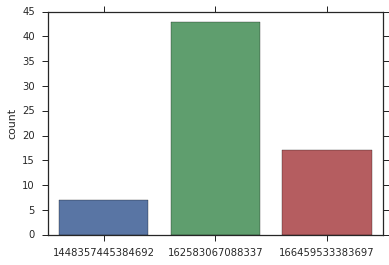

In [184]:
#assign the facebook fans page that you prefered
fids=['162583067088337','166459533383697','1448357445384692']

#遠傳 中華 台哥大
#elasticsearch repository provided by this course
host = '140.118.126.237:9200'

higherLike(fids,host)


# 列出各文章裡的詞的tfidf值 only for 中華電信

In [ ]:
mining() #會跑比較久 因為資料有點多

# 明顯看出台灣大哥大這兩系列文章較少，為何呢～～

In [126]:
def boxPlotFBFansPageComp(fids,host,pngFilePath,outlierFilter):
    data=[]
    for fid in fids:
        conn = pyes.es.ES(host)
        tq = pyes.query.TermQuery(field="fid", value=fid)
        tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
        qsearch = pyes.query.Search(tq) 
        qsearch.agg.add(tagg) 
        result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='comment')
        #print json.dumps(result.aggs,indent=2) 
        for fidpid_summary in result.aggs["pid"]["buckets"]:
            #print fidpid_summary["key"] + ',' + str(fidpid_summary["doc_count"])
            if fidpid_summary["doc_count"] < outlierFilter or outlierFilter < 0:
                data.append([fidpid_summary["doc_count"],fid,fidpid_summary["key"]])

    df=pd.DataFrame(data,columns={'count','fid','fidpid'})
    sns.set(style="ticks")
    sns_plot=sns.boxplot(x="fid", y="count", data=df, palette="PRGn")
    fig=sns_plot.get_figure()
    fig.savefig(pngFilePath)

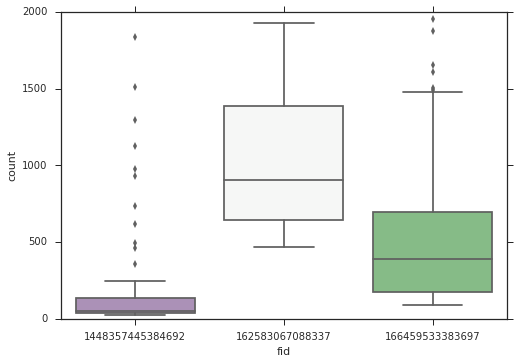

In [127]:
pngFilePath="output.png"

outlierFilter=2000

boxPlotFBFansPageComp(fids,host,pngFilePath,outlierFilter)

## 可以看出台灣大哥大的讚數分佈跟其他家有毀滅性的差異
## 既不推廣新方案，也不抽獎 應該是他們沒什麼讚的原因之一